In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import make_pipeline

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


# 데이터 불러오기

- NBA 선수들이 5년이상 리그에 남을지 대한 예측


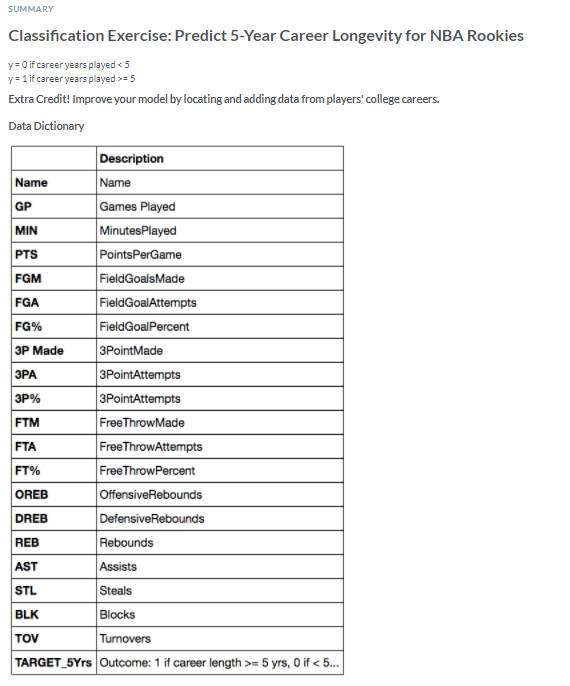

In [ ]:
Image("C:/Python/DeepLearning/data/NBA.png", width=800)

In [2]:
df1 = pd.read_csv('data/nba_logreg.csv')
df1

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


In [3]:
df1.shape

(1340, 21)

- 중복된 이름 처리

In [4]:
df1.duplicated('Name').sum()

46

In [6]:
df1.drop_duplicates(subset=['Name'], keep=False, inplace=True)

In [7]:
df1.duplicated('Name').sum()

0

In [8]:
df1.shape

(1265, 21)

# NBA PLAYERS 선수 정보

- 중복된 이름 처리

In [9]:
df1950 = pd.read_csv('1950/Players.csv', index_col = 'Unnamed: 0')
df1950.rename(columns = {'Player': 'Name'}, inplace=True)
df1950.head()

,Name,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [10]:
df1950.duplicated('Name').sum()

0

In [11]:
df1950_1 = pd.read_csv('1950/player_data.csv')
df1950_1.rename(columns = {'name': 'Name'}, inplace=True)
df1950_1.head()

,Name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [12]:
df1950_1.duplicated('Name').sum()

50

In [13]:
dups = df1950_1.pivot_table(index=['Name'], aggfunc='size')

In [14]:
df1950_1.drop_duplicates(subset='Name',keep=False,inplace=True)

In [15]:
df1950_1.duplicated('Name').sum()

0

In [16]:
df1950 =pd.merge(df1950,df1950_1,on='Name', how='inner')

In [17]:
df1950.duplicated('Name').sum()

0

In [18]:
df = pd.merge(df1,df1950,on='Name', how='inner')

In [19]:
df.duplicated("Name").sum()

0

In [20]:
df['college'].isnull().sum()

22

In [21]:
df.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs', 'height_x', 'weight_x', 'collage', 'born',
       'birth_city', 'birth_state', 'year_start', 'year_end', 'position',
       'height_y', 'weight_y', 'birth_date', 'college'],
      dtype='object')

In [22]:
df.drop(columns=['collage','year_start', 'year_end','height_y','weight_y'], inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 0 to 1231
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1232 non-null   object 
 1   GP           1232 non-null   int64  
 2   MIN          1232 non-null   float64
 3   PTS          1232 non-null   float64
 4   FGM          1232 non-null   float64
 5   FGA          1232 non-null   float64
 6   FG%          1232 non-null   float64
 7   3P Made      1232 non-null   float64
 8   3PA          1232 non-null   float64
 9   3P%          1224 non-null   float64
 10  FTM          1232 non-null   float64
 11  FTA          1232 non-null   float64
 12  FT%          1232 non-null   float64
 13  OREB         1232 non-null   float64
 14  DREB         1232 non-null   float64
 15  REB          1232 non-null   float64
 16  AST          1232 non-null   float64
 17  STL          1232 non-null   float64
 18  BLK          1232 non-null   float64
 19  TOV   

In [24]:
from datetime import datetime
df['birth_date'] = pd.to_datetime(df['birth_date'])

In [25]:
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,TOV,TARGET_5Yrs,height_x,weight_x,born,birth_city,birth_state,position,birth_date,college
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,1.3,0.0,206.0,86.0,1997.0,Kinston,North Carolina,F,1997-09-02,Duke University
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,1.6,0.0,198.0,96.0,1994.0,San Antonio,Texas,G,1994-10-28,University of Kentucky
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.0,0.0,211.0,106.0,1983.0,Inglewood,California,G-F,1993-03-20,St. John's University
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.0,1.0,203.0,86.0,1970.0,Bronx,New York,G,1970-02-01,St. John's University
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,0.8,1.0,213.0,110.0,1969.0,Salem,Massachusetts,C,1969-09-10,Georgia Institute of Technology


# EDA1: 농구 선수 출신 대학의 영향

- tableau 사용 --> geocode로 long/lat 구함

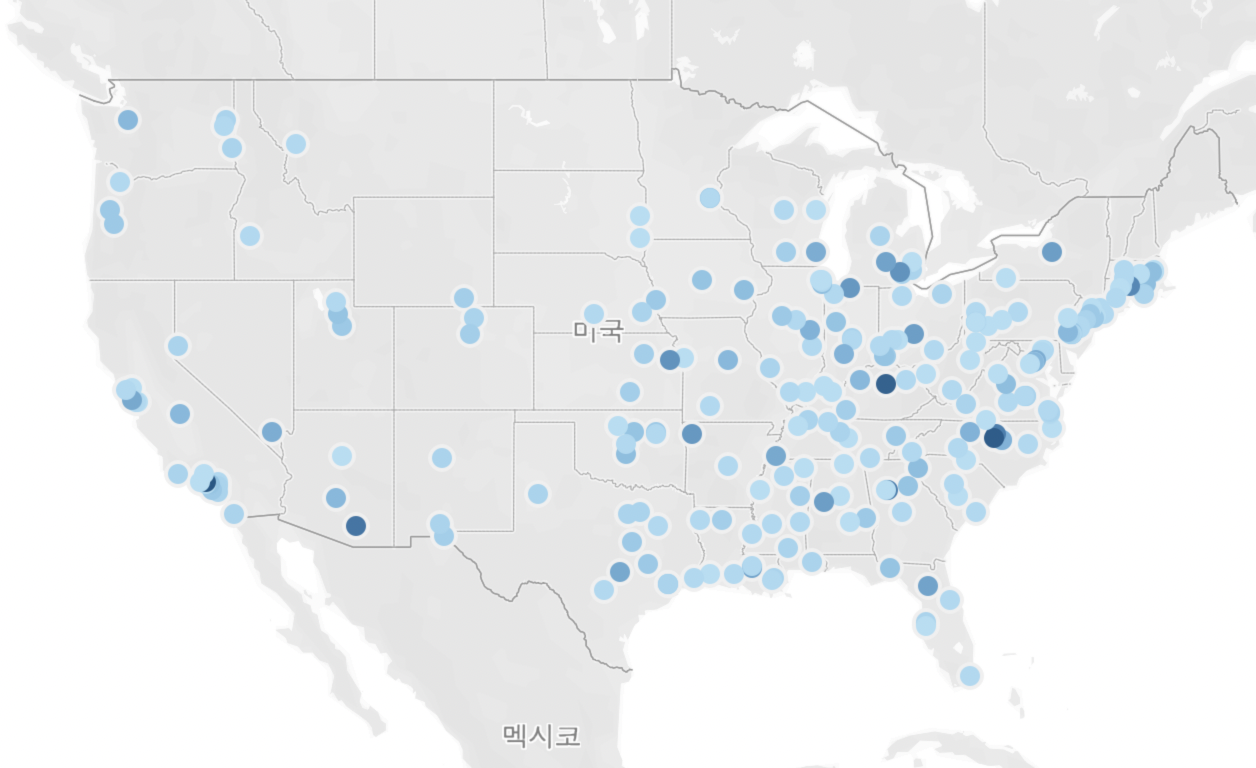

In [101]:
from IPython.display import Image
Image("C:/Python/DeepLearning/data/NBA_collage_map.png", width=800)

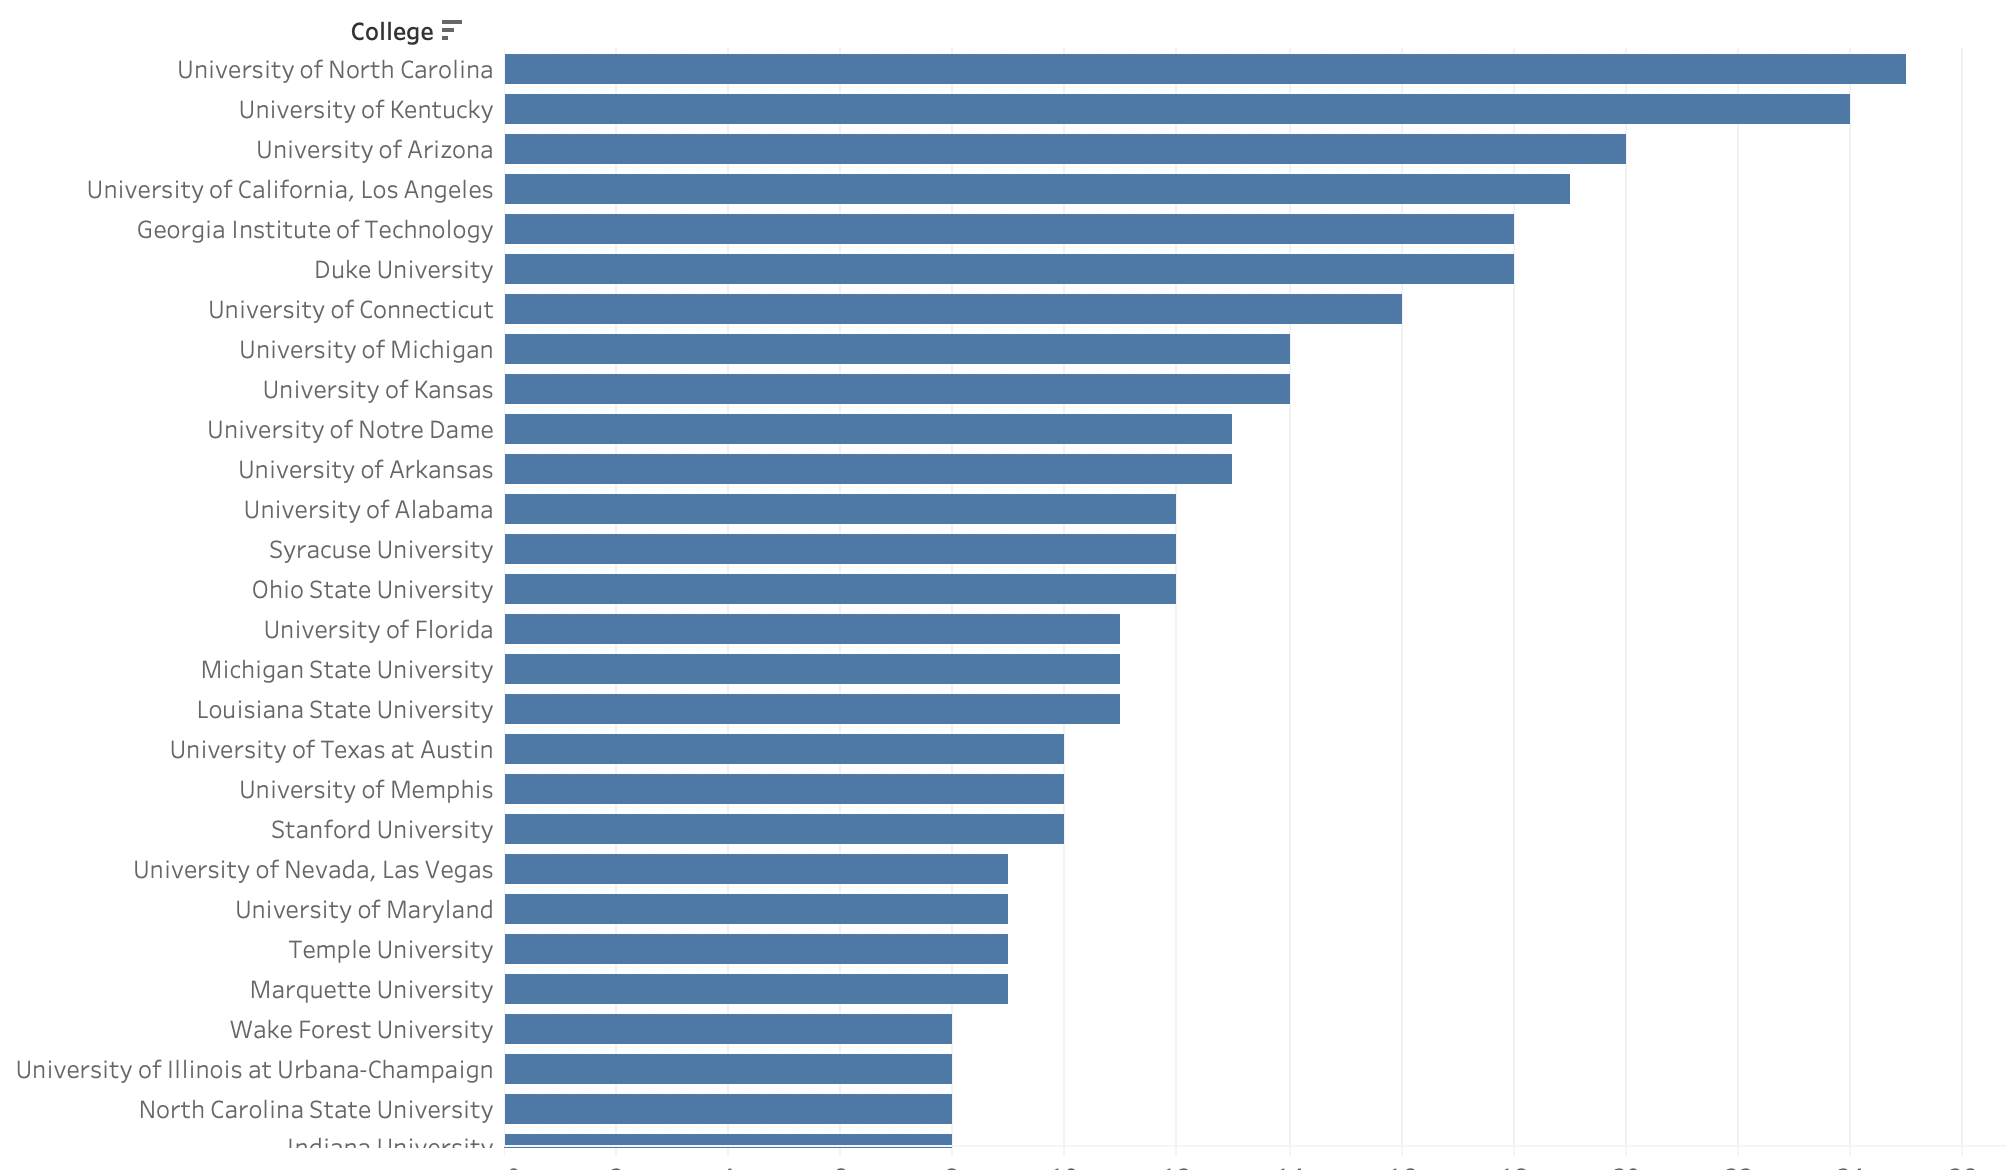

In [103]:
Image("C:/Python/DeepLearning/data/NBA_college_bar.png", width=800)

# EDA2: 키/몸무게와 TARGET

Text(0, 0.5, 'weight')

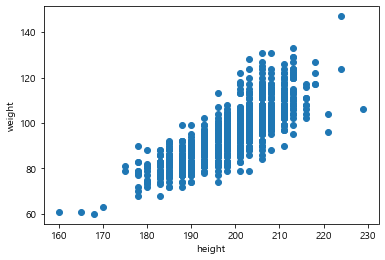

In [104]:
X = df['height_x'].values
Y = df['weight_x'].values
Z = df['TARGET_5Yrs'].values

plt.scatter(X, Y)
plt.xlabel('height')
plt.ylabel('weight')

In [105]:
np.corrcoef(X,Y)[0,1]  # 강한 양적 선형관계 나옴

0.815283944235219

Text(0, 0.5, 'target')

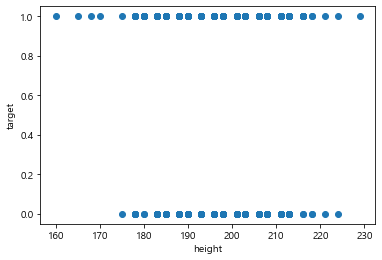

In [112]:
plt.scatter(X,Z)
plt.xlabel('height')
plt.ylabel('target')

In [115]:
np.corrcoef(X,Z)[0,1]

0.057537127722815086

Text(0, 0.5, 'target')

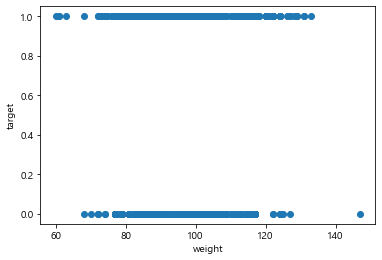

In [113]:
plt.scatter(Y, Z)
plt.xlabel('weight')
plt.ylabel('target')

In [114]:
np.corrcoef(Y,Z)[0,1]

0.06243610926247015

# EDA3: 농구 포지션 별 PERFORMANCE 수치 특징

F -forward
G - guard
G-F - guard forward
C- center
F-G - forward guard
F-C - forward center
C-F - center forward

In [ ]:
df['position'].unique()

array(['F', 'G', 'G-F', 'C', 'F-G', 'F-C', 'C-F'], dtype=object)

In [ ]:
df['position'].value_counts()

G      463
F      353
F-C    108
G-F    101
C       95
F-G     62
C-F     50
Name: position, dtype: int64

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='GP'>

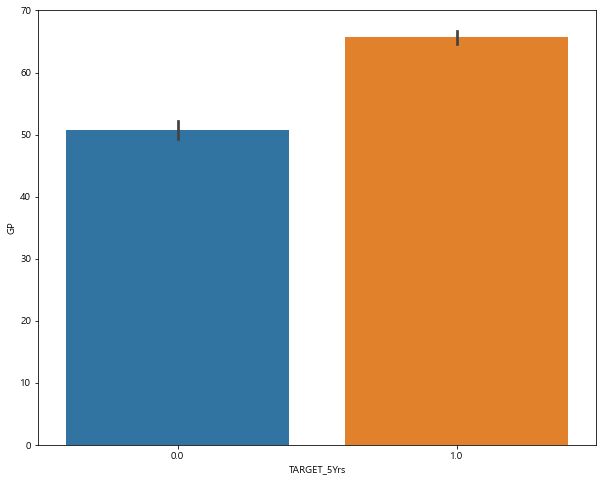

In [126]:
#GAMES PLAYED
plt.figure(figsize=(10,8))
sns.barplot(x='TARGET_5Yrs', y='GP',  data= df)

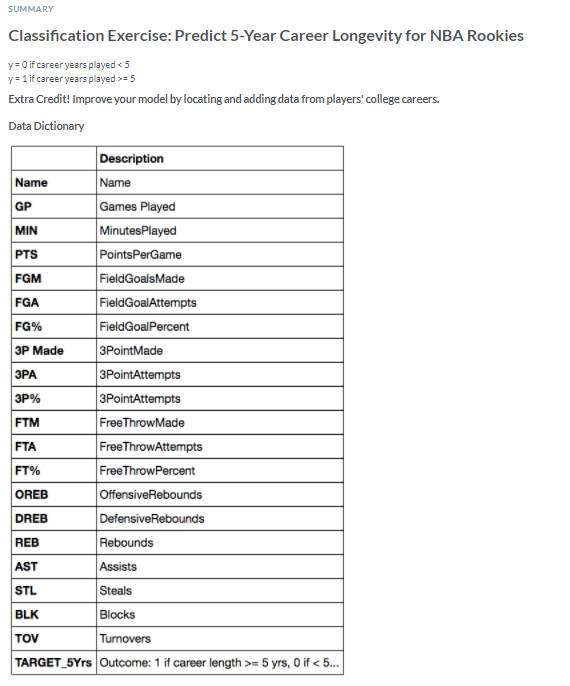

In [127]:
Image("C:/Python/DeepLearning/data/NBA.png", width=800)

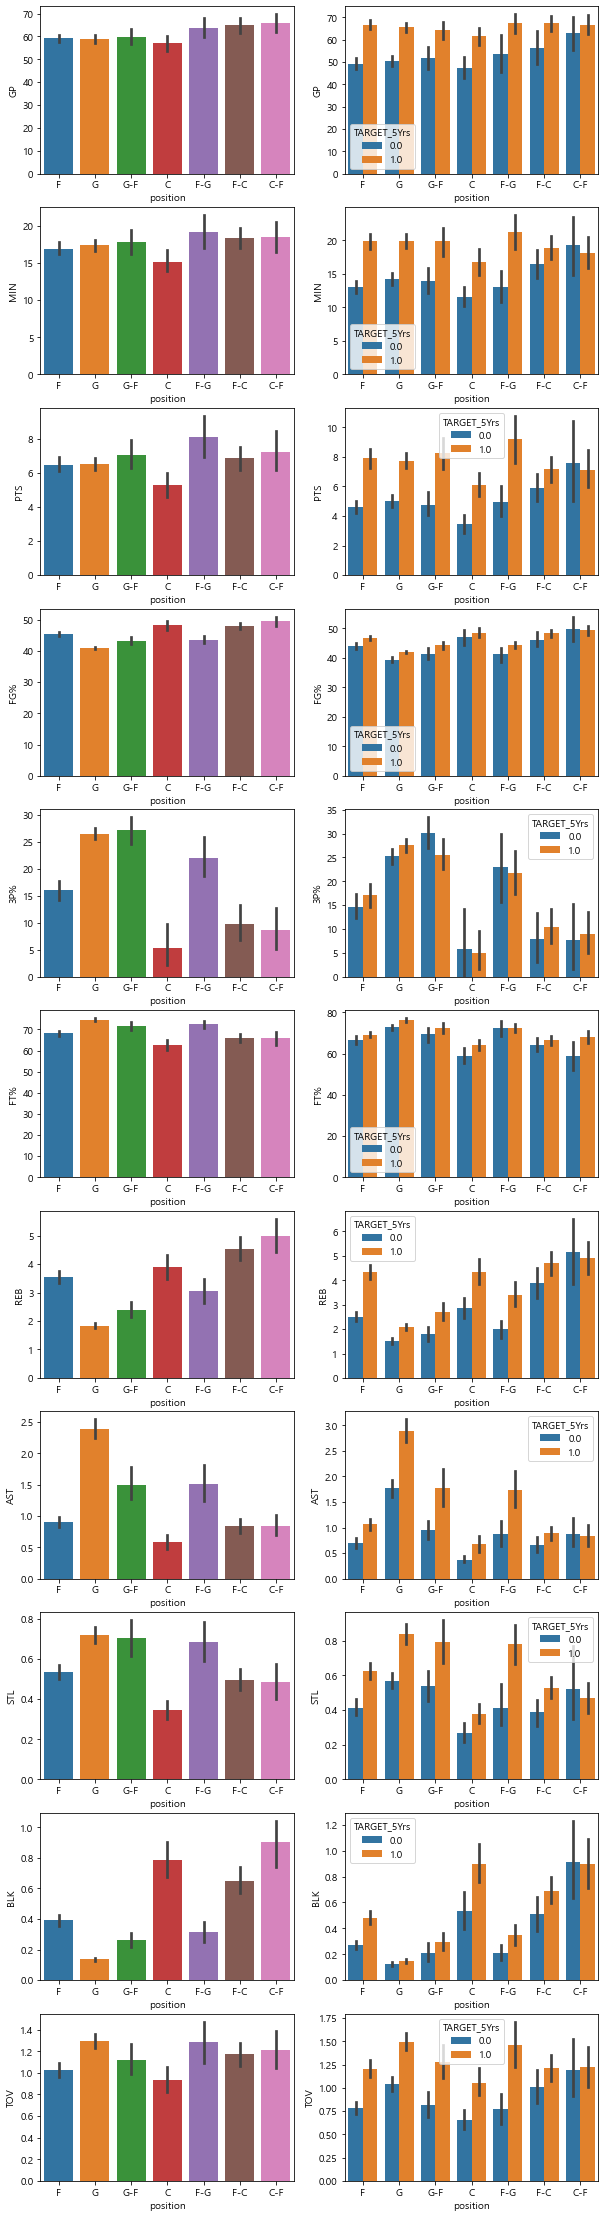

In [116]:

plt.figure(figsize=(10,40))
features = ['GP','MIN','PTS','FG%','3P%','FT%','REB','AST','STL','BLK','TOV']
#
for i,x in enumerate(features):
        plt.subplot(11, 2, 2*(i+1)-1)
        sns.barplot(x='position', y=x,  data= df)
        plt.subplot(11, 2, 2*(i+1))
        sns.barplot(x='position', y=x,  data= df, hue='TARGET_5Yrs')

# EDA 4: 모든 feature의 상관관계…  feature selection

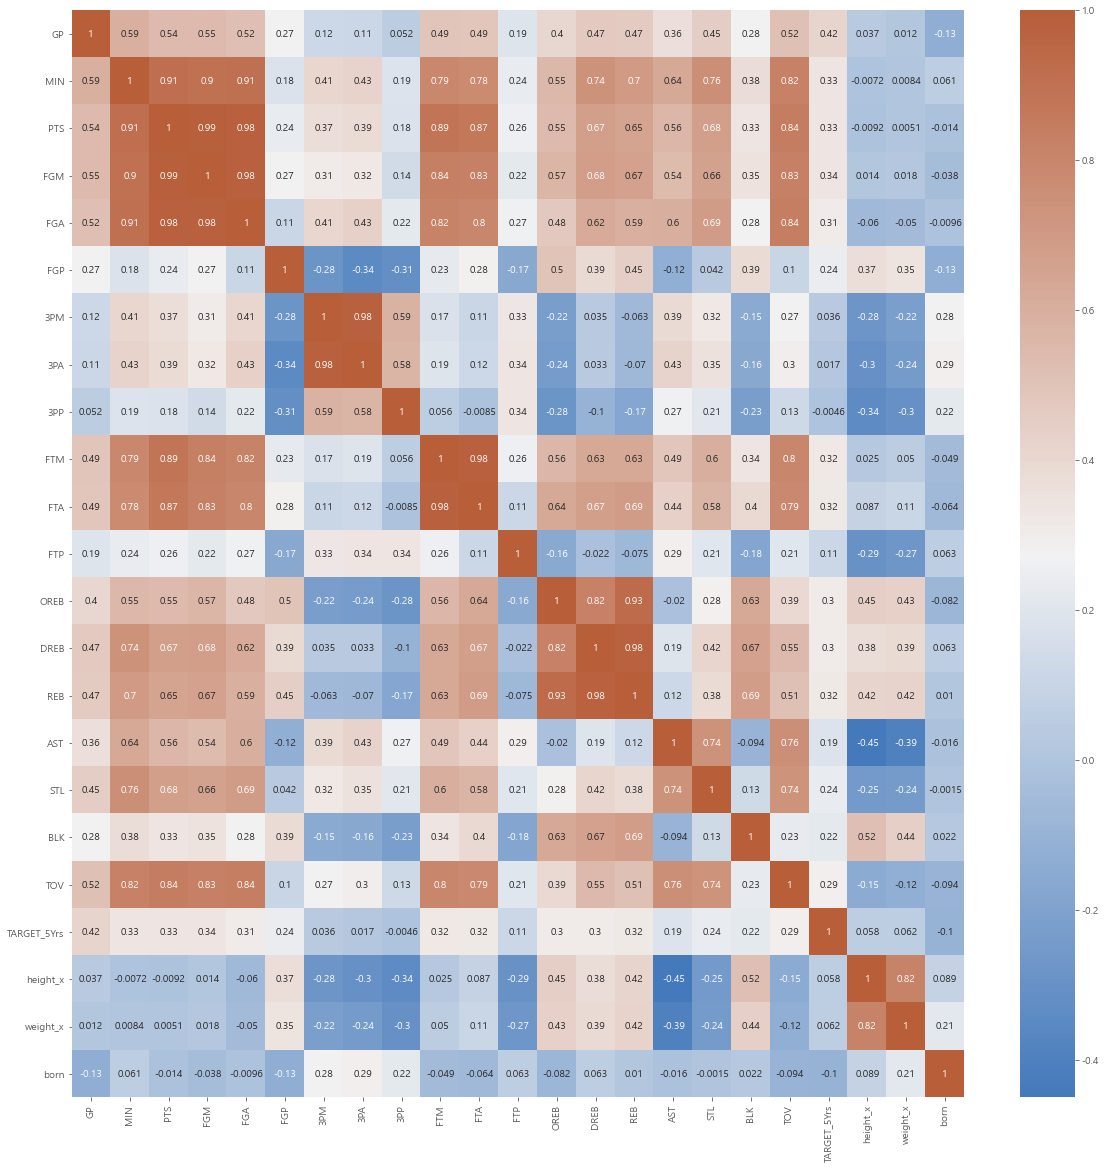

In [ ]:
#변수 간 다중공선성 heatmap으로 확인
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=cmap)
plt.show()

#### VIF(Variance Inflation Factor)를 사용하여 의존적인 변수 삭제

In [ ]:
df.shape[1]

29

In [ ]:
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices("TARGET_5Yrs ~ MIN" , df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[['GP', 'MIN', 'PTS', 'FGM', '3PM', 'FGA', 'FGP', '3PA',
       'FTM', 'FTA', 'FTP', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV']].values, i) for i in range(17)]
vif['features'] = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FGP', '3PA', '3PM'
        'FTM', 'FTA', 'FTP', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV']
vif

,VIF Factor,features
0,22.015030,GP
1,87.720535,MIN
2,11388.352363,PTS
3,6829.361954,FGM
4,83.772053,FGA
5,297.777222,FGP
6,72.069703,3PA
7,64.634754,3PMFTM
8,592.179857,FTA
9,174.040933,FTP


In [ ]:
vif.sort_values(by = 'VIF Factor',ascending = False)

,VIF Factor,features
2,11388.352363,PTS
3,6829.361954,FGM
13,5057.046886,REB
12,2256.473618,DREB
11,625.584075,OREB
8,592.179857,FTM
4,297.777222,FGA
9,174.040933,FTA
1,87.720535,MIN
6,83.772053,3P Made


# TENSORFLOW

In [ ]:
x_data = df[['GP', 'MIN', 'PTS', 'FG%', '3P%', 'FT%', 'REB', 'AST', 'STL', 'BLK', 'TOV']].astype(float).values
y_data = df[['TARGET_5Yrs']].astype(float).values

In [86]:
x_data = df[['GP', 'MIN', 'PTS', 'FG%', '3P%', 'FT%', 'REB', 'AST', 'STL', 'BLK', 'TOV']].astype(float).values
y_data = df[['TARGET_5Yrs']].astype(float).values

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_data)

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,
                                                    y_data,
                                                    test_size = 0.3,
                                                    stratify = y_data,
                                                    random_state= 111)

In [88]:
x = tf.constant(x_train, tf.float32)
y = tf.constant(y_train, tf.float32)

initX = tf.initializers.GlorotUniform()
w = tf.Variable(initX(shape= [x_train.shape[1],y_train.shape[1]])) #[feature, label]
b = tf.Variable(initX(shape = [y_train.shape[1]])) # label

In [89]:
w.shape, b.shape

(TensorShape([11, 1]), TensorShape([1]))

In [90]:
def compute_loss():
    z = tf.matmul(x,w) + b
    hx = tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits = z)
    cost = tf.reduce_mean(hx)
    return cost

In [91]:
optimizer = Adam(0.1)
patience = 100
min_delta = 0.001
pcnt = 0
hist_cost = []

for i in range(1000):
    optimizer.minimize(compute_loss, var_list = [w,b])
    c = compute_loss().numpy()
    hist_cost.append(c)
    print(i, "cost: ", compute_loss().numpy())

    if i >0:
        if hist_cost[i-1] - hist_cost[i] > min_delta:
            pcnt = 0
        else:
            pcnt += 1
        if pcnt >= patience:
            print('early stop')
            break

0 cost:  nan
1 cost:  nan
2 cost:  nan
3 cost:  nan
4 cost:  nan
5 cost:  nan
6 cost:  nan
7 cost:  nan
8 cost:  nan
9 cost:  nan
10 cost:  nan
11 cost:  nan
12 cost:  nan
13 cost:  nan
14 cost:  nan
15 cost:  nan
16 cost:  nan
17 cost:  nan
18 cost:  nan
19 cost:  nan
20 cost:  nan
21 cost:  nan
22 cost:  nan
23 cost:  nan
24 cost:  nan
25 cost:  nan
26 cost:  nan
27 cost:  nan
28 cost:  nan
29 cost:  nan
30 cost:  nan
31 cost:  nan
32 cost:  nan
33 cost:  nan
34 cost:  nan
35 cost:  nan
36 cost:  nan
37 cost:  nan
38 cost:  nan
39 cost:  nan
40 cost:  nan
41 cost:  nan
42 cost:  nan
43 cost:  nan
44 cost:  nan
45 cost:  nan
46 cost:  nan
47 cost:  nan
48 cost:  nan
49 cost:  nan
50 cost:  nan
51 cost:  nan
52 cost:  nan
53 cost:  nan
54 cost:  nan
55 cost:  nan
56 cost:  nan
57 cost:  nan
58 cost:  nan
59 cost:  nan
60 cost:  nan
61 cost:  nan
62 cost:  nan
63 cost:  nan
64 cost:  nan
65 cost:  nan
66 cost:  nan
67 cost:  nan
68 cost:  nan
69 cost:  nan
70 cost:  nan
71 cost:  nan
72

# KERAS

In [118]:
x_data = df[['GP', 'MIN', 'PTS', 'FG%', '3P%', 'FT%', 'REB', 'AST', 'STL', 'BLK', 'TOV']].astype(float).values
y_data = df[['TARGET_5Yrs']].astype(float).values

In [119]:
df[['GP', 'MIN', 'PTS', 'FG%', '3P%', 'FT%', 'REB', 'AST', 'STL', 'BLK', 'TOV']].isnull().sum()

GP     0
MIN    0
PTS    0
FG%    0
3P%    8
FT%    0
REB    0
AST    0
STL    0
BLK    0
TOV    0
dtype: int64

In [120]:
df[['GP', 'MIN', 'PTS', 'FG%', '3P%', 'FT%', 'REB', 'AST', 'STL', 'BLK', 'TOV']].describe()

,GP,MIN,PTS,FG%,3P%,FT%,REB,AST,STL,BLK,TOV
count,1232.000000,1232.000000,1232.000000,1232.000000,1224.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,59.980519,17.343182,6.610146,44.037175,19.585376,70.368506,2.956656,1.510714,0.604464,0.354627,1.159172
std,17.345337,8.129945,4.093134,6.098262,16.205364,10.533987,1.950681,1.436050,0.399436,0.393234,0.686505
min,11.000000,3.100000,0.700000,23.800000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.100000
25%,47.000000,10.800000,3.600000,40.100000,0.000000,64.875000,1.500000,0.500000,0.300000,0.100000,0.700000
50%,62.000000,15.900000,5.450000,43.900000,23.100000,71.200000,2.500000,1.000000,0.500000,0.200000,1.000000
75%,76.250000,22.600000,8.600000,47.700000,32.900000,77.500000,3.800000,1.900000,0.800000,0.500000,1.500000
max,82.000000,40.900000,23.700000,73.700000,100.000000,100.000000,12.300000,10.600000,2.500000,3.400000,4.200000


In [121]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data, random_state = 111)

In [123]:
def createModel():
    dense = Dense(units= 1, input_dim =11, activation = 'sigmoid')
    model = Sequential([dense])
    model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['acc'])
    return model

In [124]:
earlyStop = EarlyStopping(monitor = 'loss', min_delta = 0.1, patience = 10)
kcf = KerasClassifier(build_fn = createModel, epochs = 2000, verbose = 1, callbacks = [earlyStop])
# monitor = "val_loss" -> epoch가 증가하며 train loss와 val loss가 교차하는 지점(=overfitting 되는 부분)에서 학습을 종료

<ipython-input-124-2a884437c2f9>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  kcf = KerasClassifier(build_fn = createModel, epochs = 2000, verbose = 1, callbacks = [earlyStop])


In [125]:
pmodel = make_pipeline(MinMaxScaler(), kcf)
pmodel.fit(x_train, y_train)

Epoch 1/2000
31/31 [==============================] - 0s 957us/step - loss: nan - acc: 0.3817
Epoch 2/2000
31/31 [==============================] - 0s 494us/step - loss: nan - acc: 0.3817
Epoch 3/2000
31/31 [==============================] - 0s 503us/step - loss: nan - acc: 0.3817
Epoch 4/2000
31/31 [==============================] - 0s 542us/step - loss: nan - acc: 0.3817
Epoch 5/2000
31/31 [==============================] - 0s 598us/step - loss: nan - acc: 0.3817
Epoch 6/2000
31/31 [==============================] - 0s 329us/step - loss: nan - acc: 0.3817
Epoch 7/2000
31/31 [==============================] - 0s 532us/step - loss: nan - acc: 0.3817
Epoch 8/2000
31/31 [==============================] - 0s 546us/step - loss: nan - acc: 0.3817
Epoch 9/2000
31/31 [==============================] - 0s 565us/step - loss: nan - acc: 0.3817
Epoch 10/2000
31/31 [==============================] - 0s 493us/step - loss: nan - acc: 0.3817


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kerasclassifier',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x000002AC6F92D610>)])

loss nan 나오는 이유
- input에 nan이 있을 때 => 없는 것 확인
- learning rate가 너무 클 때 => 0.001까지 낮춰봤는데도 안됨
- log(0) 계산이 있을 때 => cost function 계산시 log(y^) 이 있는데 y^ 중 0이 없는 것을 확인함